<a href="https://colab.research.google.com/github/JIPalliano/Django/blob/master/projeto_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de análise de dados(Pandas) - Ismael Palliano

In [ ]:
#importando a biblioteca do Panda.

import pandas as pd
import datetime


game = pd.read_csv("/content/drive/MyDrive/datasets/vgsales.csv", error_bad_lines=False)

game = game.rename(columns={"Rank":"Ranque", "Name":"Nome", "Platform":"Plataforma", "Year":"Data", "Genre":"Gênero", "Publisher":"Editora", "NA_Sales":"NA_Vendas","EU_Sales":"EU_Vendas", "JP_Sales":"JP_Vendas", "Other_Sales":"Outras_Vendas", "Global_Sales":"Vendas_Mundial"})

game = game.fillna(0)

game["Data"] = game["Data"].astype("int64")

game["Data"] = pd.to_datetime(game["Data"], unit="D",errors='coerce')


In [ ]:
game.head(4)

    

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial
0,1,Wii Sports,Wii,1975-06-30,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1975-06-09,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,1975-07-02,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,1975-07-03,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


In [ ]:
#criando grupos por ano
game.groupby(game["Data"].dt.year)["Nome"].sum()

Data
1970    Madden NFL 2004FIFA Soccer 2004LEGO Batman: Th...
1975    Wii SportsSuper Mario Bros.Mario Kart WiiWii S...
Name: Nome, dtype: object

In [ ]:
game["Ano_Venda"] = game["Data"].dt.year

In [ ]:
game.sample(15)

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial,Ano_Venda
844,846,TouchMaster,DS,1975-07-01,Puzzle,Midway Games,0.49,1.27,0.00,0.25,2.01,1975
13494,13496,Praetorians,PC,1975-06-27,Strategy,Eidos Interactive,0.00,0.04,0.00,0.00,0.04,1975
10272,10274,GiFTPiA,GC,1970-01-01,Role-Playing,Unknown,0.00,0.00,0.11,0.00,0.11,1970
14145,14147,The Legend of Heroes: Trails in the Sky SC Evo...,PSV,1975-07-09,Role-Playing,Kadokawa Games,0.00,0.00,0.03,0.00,0.03,1975
12764,12766,Starwinder: The Ultimate Space Race,PS,1975-06-20,Racing,Mindscape,0.03,0.02,0.00,0.00,0.06,1975
5392,5394,Silent Hill HD Collection,PS3,1975-07-06,Action,Konami Digital Entertainment,0.15,0.11,0.03,0.05,0.34,1975
10240,10242,Breakout,PS,1975-06-23,Puzzle,Hasbro Interactive,0.06,0.04,0.00,0.01,0.11,1975
11034,11036,Last Rebellion,PS3,1975-07-04,Role-Playing,Nippon Ichi Software,0.06,0.01,0.01,0.01,0.09,1975
6059,6061,"Sakura Wars: So Long, My Love",PS2,1975-06-29,Role-Playing,Sega,0.07,0.05,0.15,0.02,0.29,1975
2957,2959,Dragon Ball Z: Budokai,GC,1975-06-27,Fighting,Atari,0.53,0.14,0.00,0.02,0.69,1975


In [ ]:
game["mes_venda"],game["dia_venda"] = (game["Data"].dt.month, game["Data"].dt.day)

In [ ]:
game.sample(5)

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial,Ano_Venda,mes_venda,dia_venda
7917,7919,Taiko no Tatsujin: Wii U Version!,WiiU,1975-07-07,Misc,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19,1975,7,7
3596,3598,Final Fantasy IV: The Complete Collection,PSP,1975-07-05,Role-Playing,Square Enix,0.13,0.09,0.27,0.06,0.56,1975,7,5
7816,7818,Tales of the World: Narikiri Dungeon 2,GBA,1975-06-26,Role-Playing,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19,1975,6,26
123,124,Red Dead Redemption,PS3,1975-07-04,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60,1975,7,4
13665,13667,GRID,PC,1970-01-01,Racing,Codemasters,0.00,0.03,0.00,0.01,0.04,1970,1,1


In [ ]:
game["Data"].min()

Timestamp('1970-01-01 00:00:00')

In [ ]:
game["diferenca_dias"] = game["Data"] - game["Data"].min()

In [ ]:
game.sample(5)

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial,diferenca_dias
12871,12873,Front Mission Evolved,PC,2010,Shooter,Square Enix,0.05,0.00,0.00,0.00,0.05,2010
15788,15791,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",PSV,2016,Adventure,NaN,0.00,0.00,0.02,0.00,0.02,2016
1344,1346,NCAA Football 2003,PS2,2002,Sports,Electronic Arts,1.16,0.08,0.00,0.19,1.44,2002
6359,6361,Summer Athletics: The Ultimate Challenge (US s...,Wii,2008,Sports,DTP Entertainment,0.23,0.04,0.00,0.00,0.27,2008
11996,11998,FIFA Soccer 2004,GC,2003,Sports,Electronic Arts,0.05,0.01,0.00,0.00,0.07,2003


In [ ]:
game['trimestre_venda'] = game["Data"].dt.quarter

In [ ]:
game.sample(5)

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial,trimestre_venda
9673,9675,Criticom,PS,1975-06-20,Fighting,Vic Tokai,0.07,0.05,0.00,0.01,0.12,2
11126,11128,Dreamer Series: Teacher,DS,1975-07-03,Simulation,Deep Silver,0.08,0.00,0.00,0.01,0.09,3
8819,8821,Kingdom of Paradise,PSP,1975-06-29,Role-Playing,Sony Computer Entertainment,0.14,0.00,0.00,0.01,0.15,2
588,589,Streets of Rage,GEN,1975-06-14,Action,Sega,1.86,0.55,0.11,0.08,2.60,2
8193,8195,Madden NFL 09,XB,1975-07-02,Sports,Electronic Arts,0.13,0.04,0.00,0.01,0.18,3


In [ ]:
vendas_janeiro_70 = game.loc[(game["Data"].dt.year == 1975) & (game["Data"].dt.month == 7)]

In [ ]:
vendas_janeiro_70

,Ranque,Nome,Plataforma,Data,Gênero,Editora,NA_Vendas,EU_Vendas,JP_Vendas,Outras_Vendas,Vendas_Mundial,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
2,3,Mario Kart Wii,Wii,1975-07-02,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1975,7,2,2008 days,3
3,4,Wii Sports Resort,Wii,1975-07-03,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1975,7,3,2009 days,3
8,9,New Super Mario Bros. Wii,Wii,1975-07-03,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1975,7,3,2009 days,3
13,14,Wii Fit,Wii,1975-07-01,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,1975,7,1,2007 days,3
14,15,Wii Fit Plus,Wii,1975-07-03,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,1975,7,3,2009 days,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,1975-07-10,Action,dramatic create,0.00,0.00,0.01,0.00,0.01,1975,7,10,2016 days,3
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,1975-07-01,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,1975,7,1,2007 days,3
16592,16595,Plushees,DS,1975-07-02,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,1975,7,2,2008 days,3
16595,16598,SCORE International Baja 1000: The Official Game,PS2,1975-07-02,Racing,Activision,0.00,0.00,0.00,0.00,0.01,1975,7,2,2008 days,3


#**visualização de dados**

In [ ]:
game["Gênero"].value_counts(ascending=True).plot.barh(color="yellow");

KeyError: ignored

In [ ]:
game.groupby(game["Data"].dt.year)["Editora"].sum().plot.pie()

In [ ]:
game["Plataforma"].value_counts()

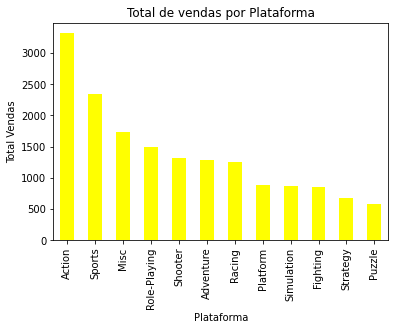

In [ ]:
import matplotlib.pyplot as plt
game["Gênero"].value_counts().plot.bar(title="Total de vendas por Plataforma", color="yellow")
plt.xlabel("Plataforma")
plt.ylabel("Total Vendas");

In [ ]:
plt.style.use("ggplot")

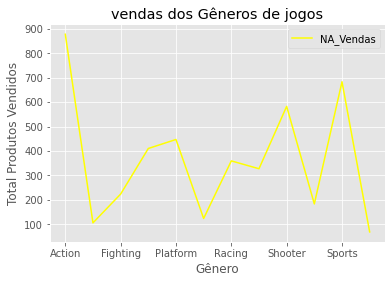

In [ ]:
game.groupby(game["Gênero"])["NA_Vendas"].sum().plot( title="vendas dos Gêneros de jogos", color="yellow")
plt.xlabel("Gênero")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [ ]:
game_genero = game[game["Gênero"] == "Sports"]

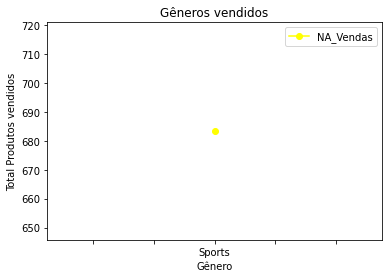

In [ ]:
game_genero.groupby(game_genero["Gênero"])["NA_Vendas"].sum().plot(title="Gêneros vendidos", color="yellow",marker = "o")
plt.xlabel("Gênero")
plt.ylabel("Total Produtos vendidos");
plt.legend()

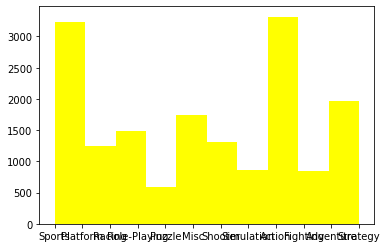

In [ ]:
plt.hist(game["Gênero"], color="yellow");

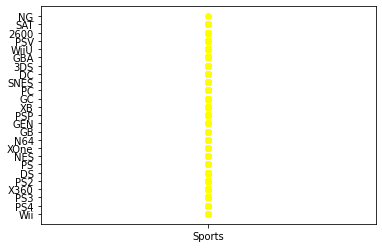

In [ ]:
plt.scatter(x=game_genero["Gênero"], y = game_genero["Plataforma"], color="yellow");

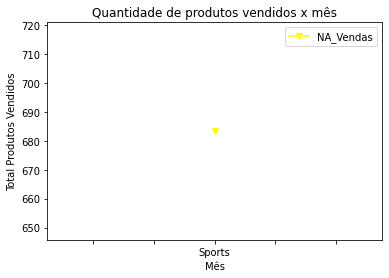

In [ ]:
game_genero.groupby(game_genero["Gênero"])["NA_Vendas"].sum().plot(color="yellow",marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico.png")

# **Explorando Dados**

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [ ]:
#para upar um arquivo no colab e para um site
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
#mostrando caminho do arquivo excel
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
df.shape

(904, 16)

In [ ]:
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [ ]:
round(df["custo"].sum(), 2)

2486783.05

In [ ]:
df["lucro"] = df["Valor Venda"] - df["custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
round(df["lucro"].sum(), 2)

3497823.09

In [ ]:
df["tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [ ]:
df["tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
df["tempo_envio"].dtype

dtype('int64')

In [ ]:
df.groupby("Marca")["tempo_envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: tempo_envio, dtype: float64

#**Missing Values**

In [ ]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

#**saber o Lucro por Ano e por Marca**

In [ ]:
df.groupby([df["Data Venda"].dt.year,"Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

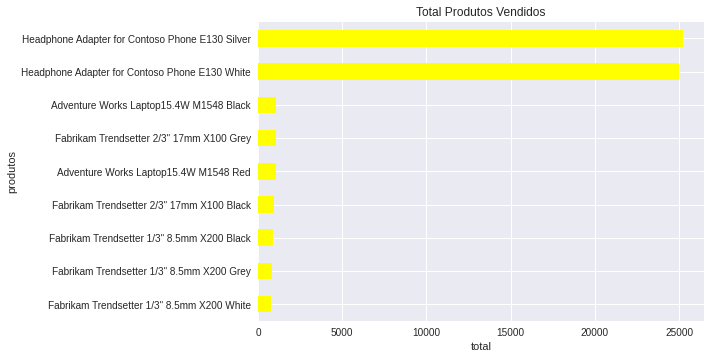

In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos", color="yellow")
plt.xlabel("total")
plt.ylabel("produtos");

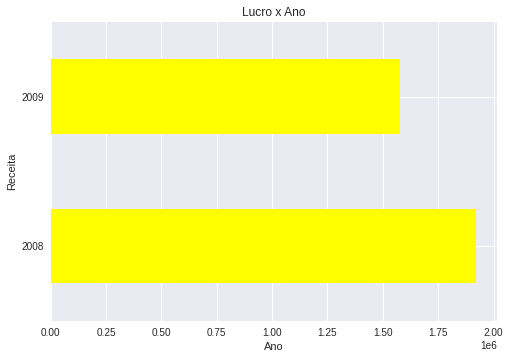

In [ ]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.barh(title="Lucro x Ano", color="yellow")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [ ]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [ ]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


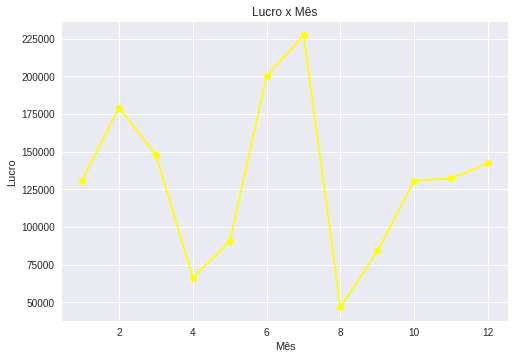

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês", color="yellow", marker="o")
plt.xlabel("Mês")
plt.ylabel("Lucro");

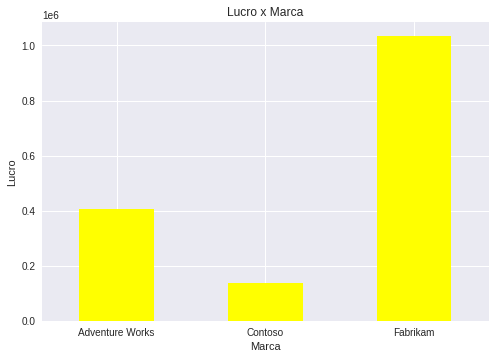

In [ ]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca", color="yellow")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

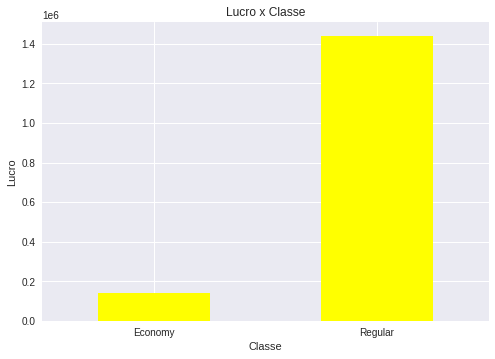

In [ ]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe", color="yellow")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [ ]:
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

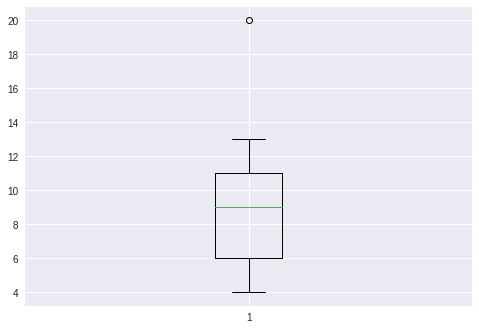

In [ ]:
plt.boxplot(df["tempo_envio"]);

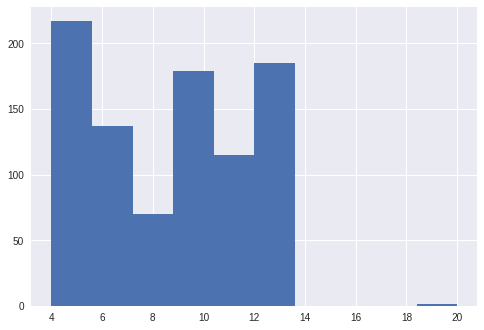

In [ ]:
plt.hist(df["tempo_envio"]);

In [ ]:
df["tempo_envio"].min()

4

In [ ]:
df["tempo_envio"].max()

20

In [ ]:
df[df["tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
df.to_csv("df_vendas_novo.csv", index=False)